In [1]:
import sys
import os
import numpy as np

In [2]:
# make sure you're logged in with `huggingface-cli login`
from huggingface_hub import login

login()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [3]:
!pip install torch
!pip install diffusers
!pip install accelerate
!pip install datasets
!pip install requests
!pip install pillow
!pip install accelerate>=0.16.0
!pip install torchvision
!pip install transformers>=4.25.1
!pip install --upgrade transformers
!pip install datasets>=2.19.1
!pip install datasets[vision]
!pip install ftfy
!pip install tensorboard
!pip install Jinja2
!pip install peft==0.7.0
!pip install --upgrade peft
# !pip install argparse
# !pip install logging
# !pip install math
!pip install shutil
!pip install contextlib
!pip install pathlib
!pip install numpy
!pip install torch
!pip install huggingface_hub
!pip install packaging
!pip install peft
!pip install tqdm
!pip install diffusers
!pip install git+https://github.com/huggingface/diffusers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!sh script_sd.sh

The following values were not passed to `accelerate launch` and had defaults used instead:
	`--num_processes` was set to a value of `1`
	`--num_machines` was set to a value of `1`
	`--dynamo_backend` was set to a value of `'no'`
To avoid this warning pass in values for each of the problematic parameters or run `accelerate config`.
2024-05-30 21:25:55.698420: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 21:25:55.705404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 21:25:55.707472: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-30 21:25:55.726528: I te

In [ ]:
import requests
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datasets import load_dataset

In [6]:
def show_image(image_path):
    """Display a JPEG image stored locally."""
    try:
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes
        plt.show()
    except Exception as e:
        print(f"Error displaying image: {e}")

def download_image(url, file_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_path, 'wb') as file:
            file.write(response.content)
        return True
    return False

def check_disk_space(threshold=100):
    """Check if the available disk space is above a certain threshold (in MB)."""
    st = os.statvfs('/')
    free_space = st.f_bavail * st.f_frsize / (1024 * 1024)  # Convert to MB
    return free_space > threshold

def compress_image(file_path, quality=85):
    """Compress the image to reduce its size."""
    try:
        img = Image.open(file_path)
        img.save(file_path, optimize=True, quality=quality)
        return True
    except Exception as e:
        print(f"Error compressing image: {e}")
        return False

def resize_and_normalize_image(file_path, target_size=(512, 512)):
    """Resize and normalize the image."""
    try:
        # Open the image
        img = Image.open(file_path)

        # Resize the image
        img = img.resize(target_size, Image.ANTIALIAS)

        # Convert the image to a numpy array
        img_array = np.array(img)

        # Normalize pixel values to range [0, 1]
        img_array = img_array.astype(np.float32) / 255.0

        # Create a new file path for the resized and normalized image
        resized_normalized_path = os.path.splitext(file_path)[0] + "_resized_normalized.jpg"

        # Save the resized and normalized image
        img_resized_normalized = Image.fromarray((img_array * 255).astype(np.uint8))
        img_resized_normalized.save(resized_normalized_path)

        return resized_normalized_path
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# curr_path_lst = !pwd
# curr_path = curr_path_lst[0]
# print(curr_path)

def main():
    # Replace with your actual Google Custom Search API key and CX
    api_key = 'your_api_key_here'
    cx = 'your_cx_key_here'

    prompts_file = input("Enter the path to the file containing prompts: ")

    with open(prompts_file, 'r') as file:
        prompts = file.readlines()

    if not check_disk_space():
        print("Not enough disk space available.")
        return

    dataset_folder = 'dataset'
    if not os.path.exists(dataset_folder):
        os.makedirs(dataset_folder)

    for prompt in prompts:
        query = prompt.strip().lower()
        skipone = False
        search_url = f"https://www.googleapis.com/customsearch/v1?q={query}&cx={cx}&key={api_key}&searchType=image"
        requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
        response = requests.get(search_url)
        results = response.json()

        if 'items' in results:
            kept_paths = []
            for i in range(5):
                # Taking the first image result
                first_image_url = results['items'][i]['link']
                print(f"{i}: Image URL for prompt '{query}': {first_image_url}")
                query_name = query.replace(' ', '_')
                query_name = query_name + str(i)
                image_path = os.path.join(dataset_folder, f"{query_name}.jpg")
                if download_image(first_image_url, image_path):
                    print(f"Image successfully downloaded and saved as {image_path}.")
                    show_image(image_path)
                    kept_paths.append(image_path)

            index = input("Enter the number of the photo you wish to keep.")
            print(kept_paths)
            for path in kept_paths:
                if index not in path:
                    if os.path.exists(path):
                        os.remove(path)

            kept_image_url = results['items'][int(i)]['link']
            print(f"{i}: Image URL for prompt '{query}': {kept_image_url}")
            image_path = os.path.join(dataset_folder, f"{query.replace(' ', '_')}.jpg")
            if download_image(kept_image_url, image_path):
                print(f"Image successfully downloaded and saved as {image_path}.")
                resized_normalized_path = resize_and_normalize_image(image_path)
                if resized_normalized_path is not None:
                    if compress_image(resized_normalized_path):
                        print(f"Image compressed and saved as {resized_normalized_path}.")
                    else:
                        print("Failed to compress image.")
                else:
                    print("Failed to resize and normalize the image.")
            else:
                print("Failed to download image.")
        else:
            print(f"No images found for the prompt '{query}'.")

# if __name__ == "__main__":
#     main()

/home/lucas_ellenberger


In [7]:
def normalize_image(image, target_size=(512, 512)):
    # Normalize the image (replace this with your normalization process)
    # For demonstration, let's just convert the image to grayscale
    image = image.resize(target_size, Image.ANTIALIAS)
    return image

def process_images(folder_path):
    # Check if the folder exists
    if not os.path.isdir(folder_path):
        print(f"The folder {folder_path} does not exist.")
        return

    # Iterate over each file in the folder
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        # Check if the file is a JPG image
        if filename.lower().endswith(".jpg") or filename.lower().endswith(".jpeg"):
            try:
                # Open the image file
                with Image.open(file_path) as img:
                    # Call the normalize function on the image
                    normalized_img = normalize_image(img)

                    # Convert image to RGB if it's not already
                    if normalized_img.mode != "RGB":
                        normalized_img = normalized_img.convert("RGB")

                    # Save the normalized image with a new filename
                    normalized_file_path = os.path.join(folder_path, f"normalized_{filename}")
                    normalized_img.save(normalized_file_path)
                    print(f"Normalized image saved as: {normalized_file_path}")
            except Exception as e:
                print(f"Error processing {filename}: {e}")

# folder_path = "/home/lucas_ellenberger/dataset"
# process_images(folder_path)

In [8]:
def convert_jpg_to_png(input_folder):
    # Create a new folder for PNG images
    output_folder = os.path.join(input_folder, "png_images")
    os.makedirs(output_folder, exist_ok=True)

    # List all files in the input folder
    files = os.listdir(input_folder)
    jpg_files = [f for f in files if f.endswith('.jpg')]

    # Convert each JPG image to PNG format
    for jpg_file in jpg_files:
        # Open the JPG image
        jpg_path = os.path.join(input_folder, jpg_file)
        img = Image.open(jpg_path)

        # Convert to PNG format
        png_path = os.path.join(output_folder, os.path.splitext(jpg_file)[0] + ".png")
        img.save(png_path, "PNG")
        print(f"{jpg_file} converted to PNG")

# if __name__ == "__main__":
#     input_folder = input("Enter the path to the folder containing JPG images: ")
#     convert_jpg_to_png(input_folder)

In [14]:
# # Example usage
# image_path = "/home/lucas_ellenberger/dataset/png_images/normalized_a_simple_diagram_of_a_combustion_reaction0.png"
# show_image(image_path)

Here is an example of asking an LLM to generate matplotlib code to create a boxplot showing 40% of students work in the government. The generated code is able to produce much better results than our image diffusion model, especially when labels and accuracy of the plot are considered.

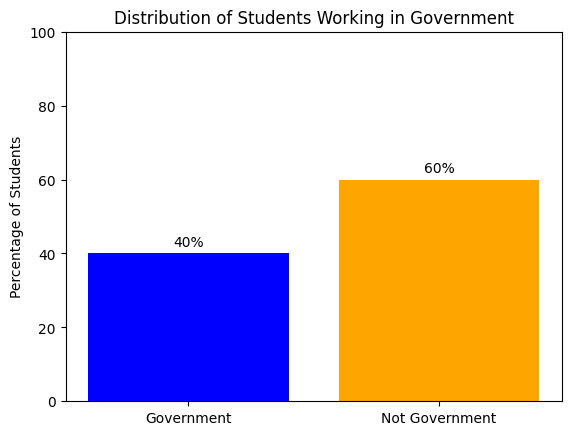

In [ ]:
# Data
labels = ['Government', 'Not Government']
sizes = [40, 60]  # percentages

# Plot
fig, ax = plt.subplots()
ax.bar(labels, sizes, color=['blue', 'orange'])

# Adding labels
for i, v in enumerate(sizes):
    ax.text(i, v + 1, str(v) + '%', ha='center', va='bottom')

ax.set_ylabel('Percentage of Students')
ax.set_title('Distribution of Students Working in Government')
plt.ylim(0, 100)  # setting y-axis limit
plt.show()

Here is an example of an LLMs output when asked to generate a box plot. Again, much better than a stable diffusion model.

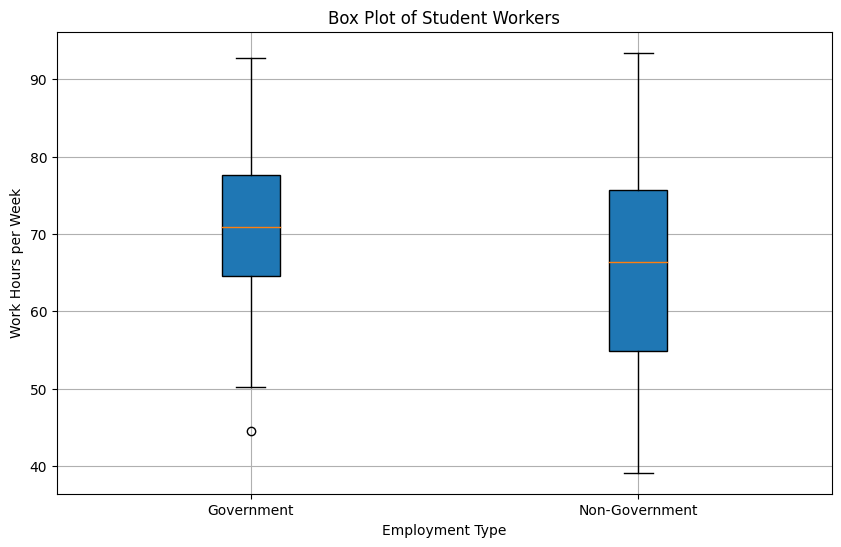

In [15]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility

# Generate sample data
government_workers = np.random.normal(loc=70, scale=10, size=60)  # 60% student workers in the government
non_government_workers = np.random.normal(loc=65, scale=15, size=40)  # 40% not in the government

# Combine data into a list
data = [government_workers, non_government_workers]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True, patch_artist=True, labels=['Government', 'Non-Government'])
plt.title('Box Plot of Student Workers')
plt.ylabel('Work Hours per Week')
plt.xlabel('Employment Type')
plt.grid(True)
plt.show()


In [ ]:
import torch
from torch import autocast
import accelerate
from diffusers import StableDiffusionPipeline
from diffusers import DDPMPipeline
from accelerate import Accelerator
from datasets import load_dataset

Import our small, custom dataset that will be used for LoRA training.

In [ ]:
dataset = load_dataset("LucasEllenberger/ChemistryImages")
print(len(dataset['train']))

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7FC05CEE8B50>, 'prompt': 'a simple diagram of a combustion reaction'}
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7FC05CEE8C70>
a simple diagram of a combustion reaction
{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7FC05CEE9180>, 'prompt': 'An image of an conical flask filled with blue liquid'}


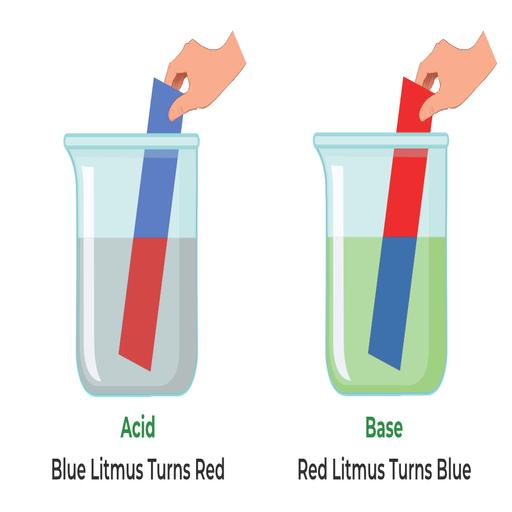

In [22]:
# print the first example on the testmini set
print(dataset["train"][0])
print(dataset["train"][0]['image']) # print the file_name
print(dataset["train"][0]['prompt']) # print the prompt
# dataset["testmini"][0]['decoded_image'] # display the image

# print the first example on the test set
print(dataset["test"][0])
# image_bytes = dataset["train"][0]['image']
# img = Image.open(image_bytes)
# img.show()
dataset["train"][1]['image']

In [ ]:
# Uncomment if you want to see a sample image from the dataset
# dataset["testmini"][0]['decoded_image']

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
pipe = StableDiffusionPipeline.from_pretrained(
	"CompVis/stable-diffusion-v1-4",
	use_auth_token=True
).to(device)

prompt = "a photo of an astronaut riding a horse on mars"
with autocast(device):
    image = pipe(prompt)["sample"][0]

image.save("astronaut_rides_horse.png")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

RuntimeError: User specified an unsupported autocast device_type 'cpu'